In [1]:
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder 
%matplotlib inline

In [2]:
df1 = pd.read_csv('accidents_2005_to_2007.csv', low_memory = False)
df2 = pd.read_csv('accidents_2009_to_2011.csv', low_memory = False)
df3 = pd.read_csv('accidents_2012_to_2014.csv', low_memory = False)

In [3]:
# Spajamo tablice u jednu
df = pd.concat([df1, df2, df3])

In [4]:
# Spremanje u .csv
df.to_csv('Accidents_2005_to_2014.csv')

In [5]:
df.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location,Year
0,200501BS00001,525680.0,178240.0,-0.191170,51.489096,1,2,1,1,04/01/2005,...,Zebra crossing,Daylight: Street light present,Raining without high winds,Wet/Damp,None,None,1,Yes,E01002849,2005
1,200501BS00002,524170.0,181650.0,-0.211708,51.520075,1,3,1,1,05/01/2005,...,Pedestrian phase at traffic signal junction,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002909,2005
2,200501BS00003,524520.0,182240.0,-0.206458,51.525301,1,3,2,1,06/01/2005,...,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,None,None,1,Yes,E01002857,2005
3,200501BS00004,526900.0,177530.0,-0.173862,51.482442,1,3,1,1,07/01/2005,...,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,None,None,1,Yes,E01002840,2005
4,200501BS00005,528060.0,179040.0,-0.156618,51.495752,1,3,1,1,10/01/2005,...,No physical crossing within 50 meters,Darkness: Street lighting unknown,Fine without high winds,Wet/Damp,None,None,1,Yes,E01002863,2005


## Opis kolona

Unnamed: 0

**Accident_Index** = Unique ID.

**Location_Easting_OSGR** = Local British coordinates x-value.

**Location_Northing_OSGR** = Local British coordinates y-value.

**Longitude**

**Latitude**

**Police_Force**

**Accident_Severity** = 1 = Fatal, 2 = Serious, 3 = Slight

**Number_of_Vehicles**

**Number_of_Casualties**

**Date** - In dd/mm/yyyy format.

**Day_of_WeekNumeric** : 1 for Sunday, 2 for Monday, and so on.

**Time** = Time the accident was reported, in UTC+0.

**Local_Authority_(District)**

**Local_Authority_(Highway)**

**1st_Road_Class** = This field is only used for junctions.

**1st_Road_Number** = This field is only used for junctions.

**Road_Type** = Some options are Roundabout, One Way, Dual Carriageway, Single Carriageway, Slip Road, Unknown.

**Speed_limit**

**Junction_Detail** = Some options are Crossroads, Roundabouts, Private Roads, Not a Junction.

**Junction_Control** = A person, a type of sign, automated, etc.

**2nd_Road_Class** = This field is only used for junctions.

**2nd_Road_Number** = This field is only used for junctions.

**Pedestrian_Crossing-Human_Control** = Was there a human controller and what type?

**Pedestrian_Crossing-Physical_Facilities** = Was it a zebra crossing, or bridge, or another type?

**Light_Conditions** = Day, night, street lights or not.

**Weather_Conditions** = Wind, rain, snow, fog.

**Road_Surface_Conditions** Wet, snow, ice, flood.

**Special_Conditions_at_Site** Was anything broken or defective, e.g. an obscured sign?

**Carriageway_Hazards** Was something in the way, e.g. a pedestrian, another accident, something in the road?

**Urban_or_Rural_Area**

**Did_Police_Officer_Attend_Scene_of_Accident**

**LSOA_of_Accident_Location**

**Year**

In [6]:
df.shape

(1504150, 33)

In [7]:
df.dtypes

Accident_Index                                  object
Location_Easting_OSGR                          float64
Location_Northing_OSGR                         float64
Longitude                                      float64
Latitude                                       float64
Police_Force                                     int64
Accident_Severity                                int64
Number_of_Vehicles                               int64
Number_of_Casualties                             int64
Date                                            object
Day_of_Week                                      int64
Time                                            object
Local_Authority_(District)                       int64
Local_Authority_(Highway)                       object
1st_Road_Class                                   int64
1st_Road_Number                                  int64
Road_Type                                       object
Speed_limit                                      int64
Junction_D

In [8]:
# tražimo postotak dokumenata koji nedostaju
df.isnull().sum()/df.shape[0]*[100]

Accident_Index                                   0.000000
Location_Easting_OSGR                            0.006715
Location_Northing_OSGR                           0.006715
Longitude                                        0.006715
Latitude                                         0.006715
Police_Force                                     0.000000
Accident_Severity                                0.000000
Number_of_Vehicles                               0.000000
Number_of_Casualties                             0.000000
Date                                             0.000000
Day_of_Week                                      0.000000
Time                                             0.007778
Local_Authority_(District)                       0.000000
Local_Authority_(Highway)                        0.000000
1st_Road_Class                                   0.000000
1st_Road_Number                                  0.000000
Road_Type                                        0.000000
Speed_limit   

**Brišemo 'Junction_Detail' and 'LSOA_of_Accident_Location' jer ili nema uopće podataka ili su podaci nebitni, tj. šifre**

In [9]:
df.drop(['Junction_Detail', 'LSOA_of_Accident_Location'], axis=1, inplace=True)

**Idući korak je brisanje svih nedostajućih vrijednosti**

In [10]:
df = df.dropna(axis=0, subset=['Location_Easting_OSGR'])

In [11]:
df = df.dropna(axis=0, subset=['Location_Northing_OSGR'])

In [12]:
df = df.dropna(axis=0, subset=['Longitude'])

In [13]:
df = df.dropna(axis=0, subset=['Latitude'])

In [14]:
df = df.dropna(axis=0, subset=['Time'])

In [15]:
df = df.dropna(axis=0, subset=['Junction_Control'])

In [16]:
df = df.dropna(axis=0, subset=['Pedestrian_Crossing-Human_Control'])

In [17]:
df = df.dropna(axis=0, subset=['Pedestrian_Crossing-Physical_Facilities'])

In [18]:
df = df.dropna(axis=0, subset=['Weather_Conditions'])

In [19]:
df = df.dropna(axis=0, subset=['Road_Surface_Conditions'])

In [20]:
df = df.dropna(axis=0, subset=['Special_Conditions_at_Site'])

In [21]:
df = df.dropna(axis=0, subset=['Carriageway_Hazards'])

In [22]:
df = df.dropna(axis=0, subset=['Did_Police_Officer_Attend_Scene_of_Accident'])

In [23]:
df.isnull().sum()/df.shape[0]*[100]

Accident_Index                                 0.0
Location_Easting_OSGR                          0.0
Location_Northing_OSGR                         0.0
Longitude                                      0.0
Latitude                                       0.0
Police_Force                                   0.0
Accident_Severity                              0.0
Number_of_Vehicles                             0.0
Number_of_Casualties                           0.0
Date                                           0.0
Day_of_Week                                    0.0
Time                                           0.0
Local_Authority_(District)                     0.0
Local_Authority_(Highway)                      0.0
1st_Road_Class                                 0.0
1st_Road_Number                                0.0
Road_Type                                      0.0
Speed_limit                                    0.0
Junction_Control                               0.0
2nd_Road_Class                 

In [24]:
df.shape

(898524, 31)

In [25]:
df['Date_and_Time'] = df['Date']+ ' ' + df['Time']

In [26]:
#U slučaju da format kolone Date_and_Time nije ispravan koristimo sljedeći kod:

time_format = '%d/%m/%Y %H:%M'
df['Date_and_Time'] = pd.to_datetime(df['Date_and_Time'], format=time_format)

In [27]:
# Razdvajanje iz Date_and_Time u kolonu Month
df['Month'] = df['Date_and_Time'].dt.month

In [28]:
df['Hour'] = df['Date_and_Time'].dt.hour

In [29]:
# Provjera Date_and_Time kolone

df['Date_and_Time'].describe()

count                  898524
unique                 622357
top       2005-10-21 15:30:00
freq                       17
first     2005-01-01 00:01:00
last      2014-12-31 23:56:00
Name: Date_and_Time, dtype: object

In [30]:
df.columns

Index(['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident',
       'Year', 'Date_and_Time', 'Month', 'Hour'],
      dtype='object')

In [31]:
# Razvrstavanje kolona po izboru

df = df[['Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR',
       'Longitude', 'Latitude', 'Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties','Date_and_Time', 'Year','Month', 'Date', 'Hour', 'Time', 'Day_of_Week' , 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Control', '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 'Did_Police_Officer_Attend_Scene_of_Accident'
       ]]

In [32]:
df.dtypes

Accident_Index                                         object
Location_Easting_OSGR                                 float64
Location_Northing_OSGR                                float64
Longitude                                             float64
Latitude                                              float64
Police_Force                                            int64
Accident_Severity                                       int64
Number_of_Vehicles                                      int64
Number_of_Casualties                                    int64
Date_and_Time                                  datetime64[ns]
Year                                                    int64
Month                                                   int64
Date                                                   object
Hour                                                    int64
Time                                                   object
Day_of_Week                                             int64
Local_Au

## Prikaz broja nesreća po godini, mjesecu, danu i satu

Text(0, 0.5, 'Number of Accidents')

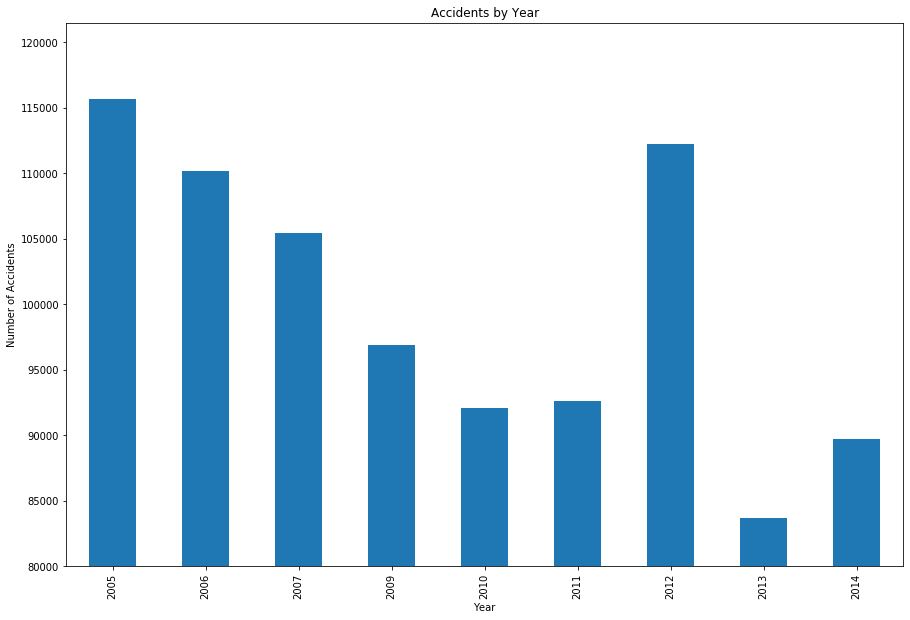

In [33]:
df.groupby('Year').size().plot(kind='bar', title='Accidents by Year', figsize = (15,10))

axes = plt.gca()
axes.set_ylim([80000, None])

plt.ylabel('Number of Accidents') 

Text(0, 0.5, 'Number of Accidents')

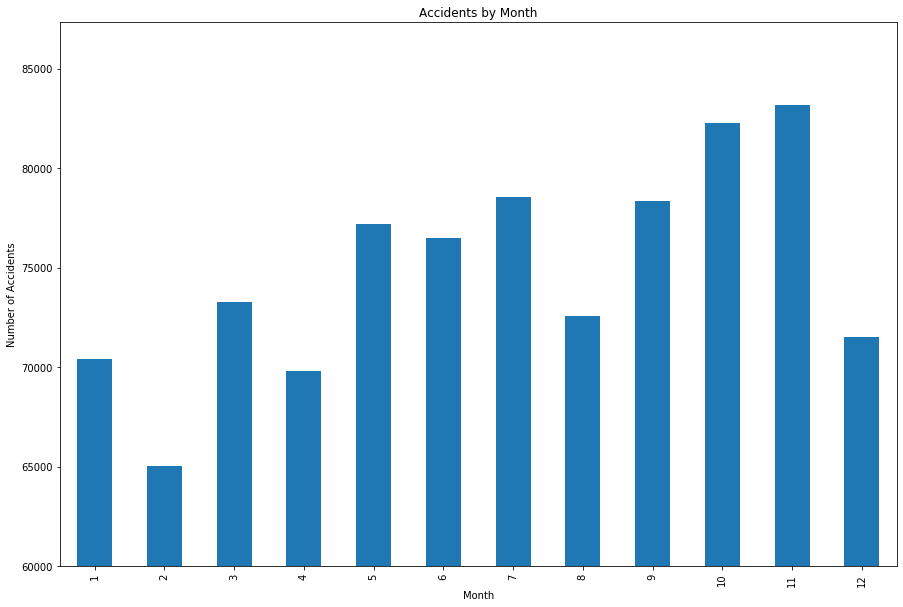

In [34]:
df.groupby('Month').size().plot(kind='bar', title='Accidents by Month', figsize = (15,10))

axes = plt.gca()
axes.set_ylim([60000, None])

plt.ylabel('Number of Accidents') 

**Drugačiji prikaz broja nesreća po godini i mjesecu**

Text(0, 0.5, 'Number of Accidents')

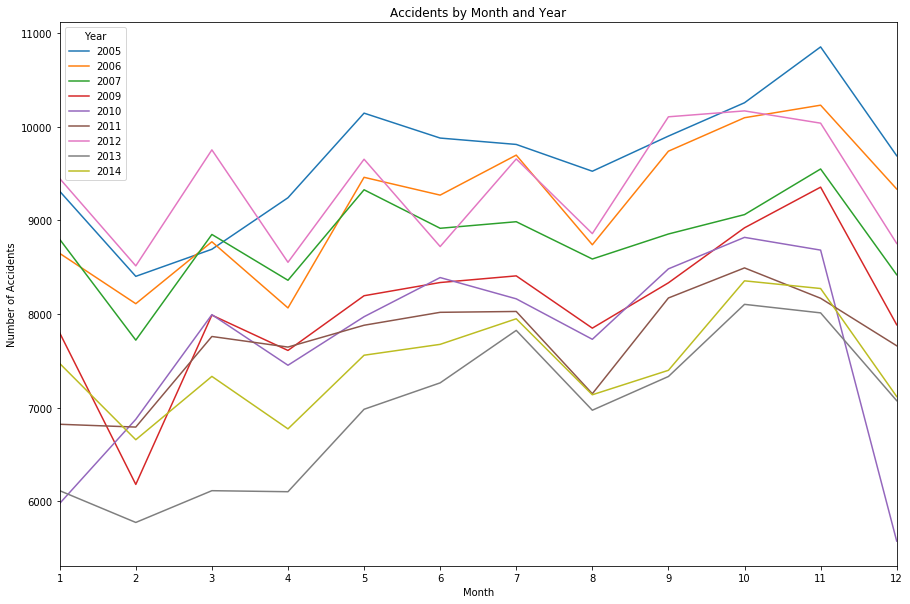

In [35]:
pt_month_year = df.pivot_table(index='Month', columns = 'Year', values = 'Date_and_Time', aggfunc = 'count')
pt_month_year
pt_month_year.plot(xticks=[1,2,3,4,5,6,7,8,9,10,11,12], figsize = (15, 10))

plt.title('Accidents by Month and Year')
plt.xlabel('Month') 
plt.ylabel('Number of Accidents') 

Text(0, 0.5, 'Number of Accidents')

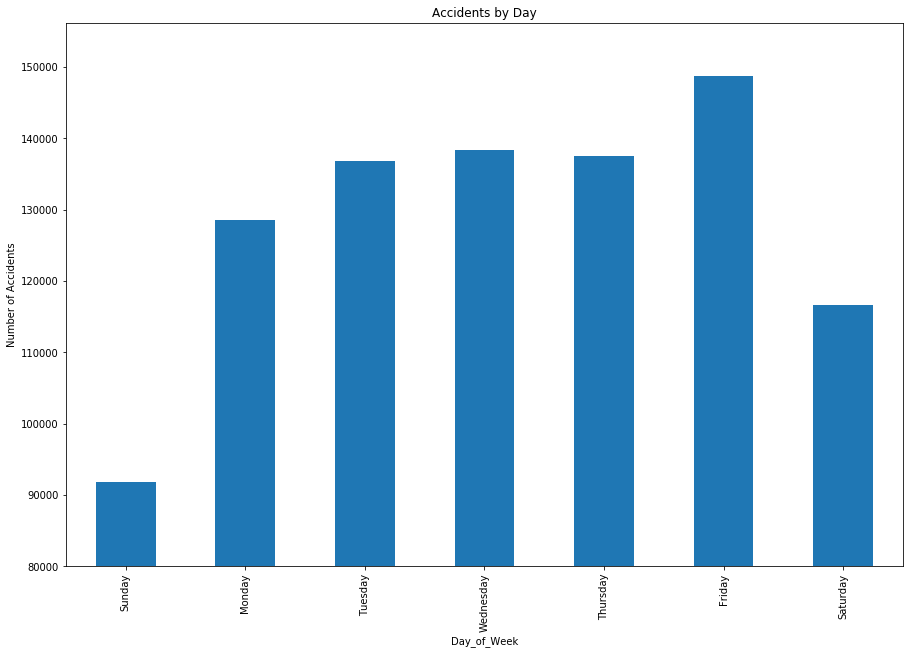

In [36]:
df.groupby('Day_of_Week').size().plot(kind='bar', title='Accidents by Day', figsize = (15,10))

axes = plt.gca()
axes.set_ylim([80000, None])

N = 7
ind = np.arange(N)
plt.xticks(ind, ('Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'))

plt.ylabel('Number of Accidents') 


# Promijena iz 1 u Nedjelju, 2 u Ponedjeljak itd
#Day_of_Week = {1 : 'Sunday', 2 : 'Monday', 3 : 'Tuesday', 4 : 'Wednesday', 5 : 'Thursday', 6 : 'Friday', 7 : 'Saturday'}
#df.Day_of_Week = [Day_of_Week[item] for item in df.Day_of_Week]

Text(0.5, 0, 'Hour of the Day')

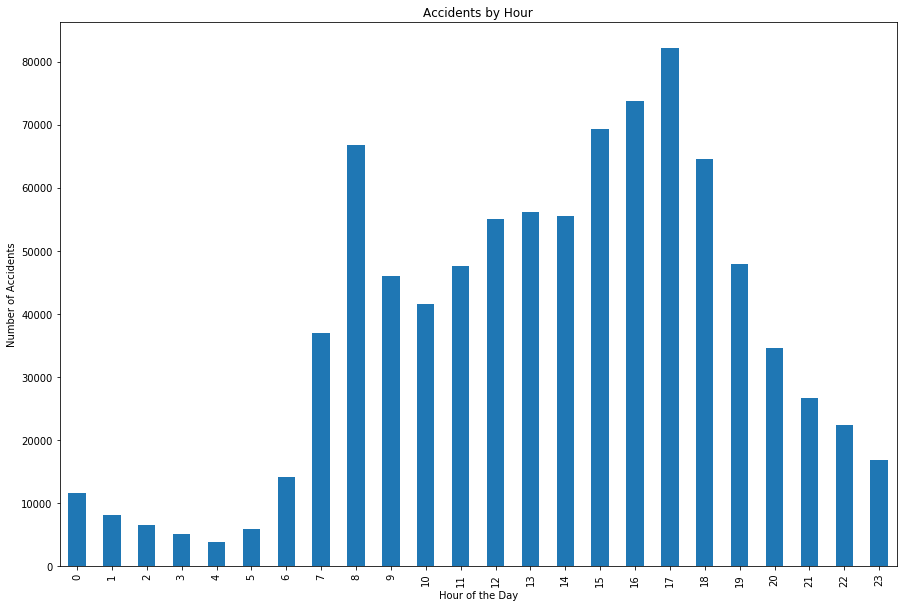

In [37]:
df.groupby('Hour').size().plot(kind='bar', title='Accidents by Hour', figsize = (15,10) )
plt.ylabel('Number of Accidents') 
plt.xlabel('Hour of the Day') 

#ili
#df.groupby(df['Date_and_Time'].dt.hour).size().plot(kind='bar', title='Accidents by Hour', figsize = (15,10))
#plt.ylabel('Number of Accidents') 
#plt.xlabel('Hour of the Day') 

**Pie charts**

Text(0, 0.5, 'Number of Accidents')

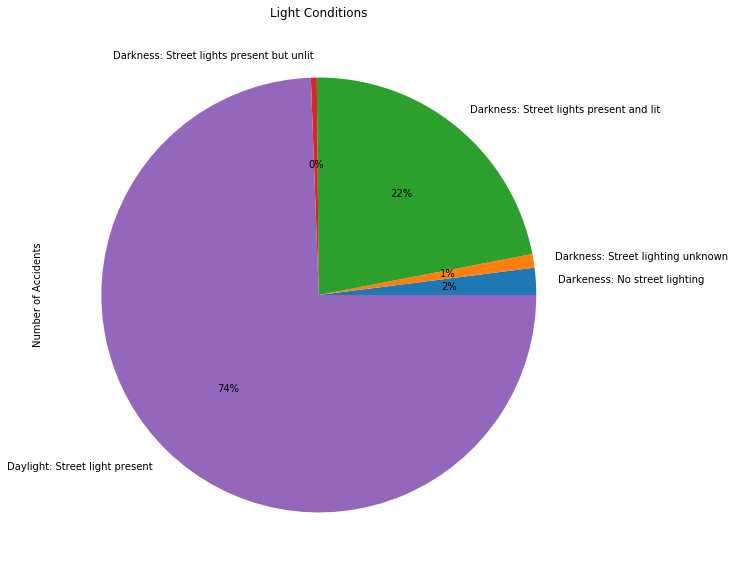

In [38]:
df['Light_Conditions'].unique()
df.groupby('Light_Conditions').size()
df.groupby('Light_Conditions').size().plot(kind = 'pie', autopct='%1.0f%%', figsize = (15,10))
plt.title('Light Conditions')
plt.ylabel('Number of Accidents') 

Text(0, 0.5, 'Number of Accidents')

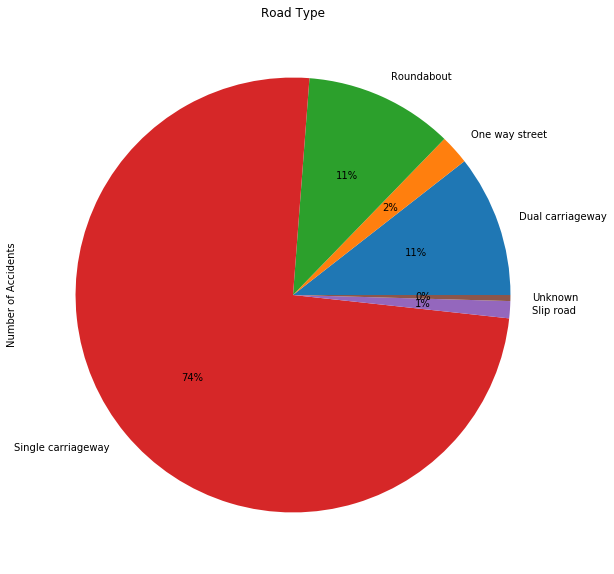

In [39]:
df['Road_Type'].unique()
df.groupby('Road_Type').size()
df.groupby('Road_Type').size().plot(kind = 'pie', autopct='%1.0f%%', figsize = (15,10))
plt.title('Road Type')
plt.ylabel('Number of Accidents') 

Text(0, 0.5, 'Number of Accidents')

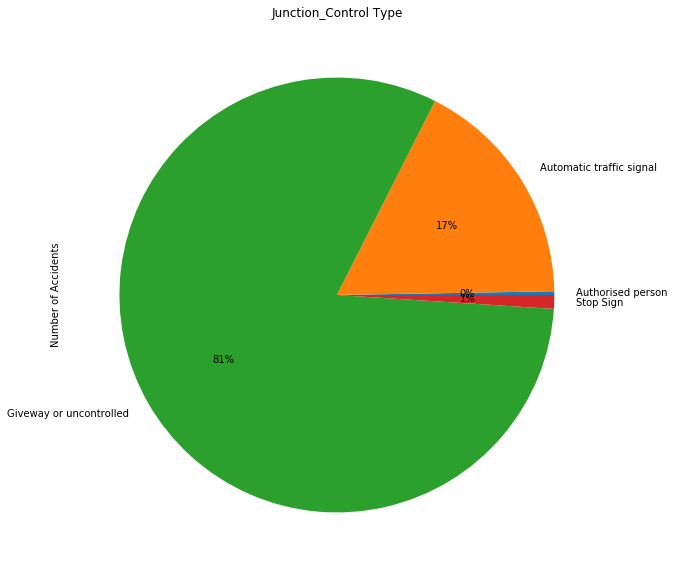

In [40]:
df['Junction_Control'].unique()
df.groupby('Junction_Control').size()
df.groupby('Junction_Control').size().plot(kind = 'pie', autopct='%1.0f%%', figsize = (15,10))
plt.title('Junction_Control Type')
plt.ylabel('Number of Accidents') 

Text(0.5, 1.0, 'Accidents Severity')

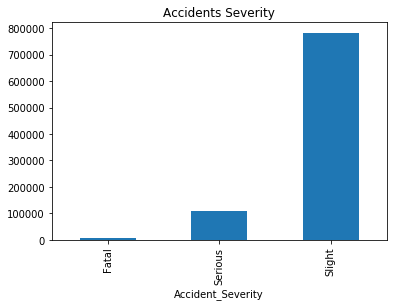

In [41]:
df['Accident_Severity'].unique()
df.groupby('Accident_Severity').size().plot( kind = 'bar')

N = 3
ind = np.arange(N)
plt.xticks(ind, ('Fatal', 'Serious', 'Slight'))

plt.title('Accidents Severity')

## Pivot tablice

In [42]:
# Zamjena 1,2 i 3 sa Fatal, Serious i Slight
df['Accident_Severity'].replace([1,2,3] ,['Fatal', 'Serious', 'Slight'], inplace = True ) 

In [43]:
df.Accident_Severity.unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

In [44]:
pd.pivot_table(df, 'Number_of_Casualties', index = ['Accident_Severity'], columns = ['Number_of_Vehicles'], aggfunc = np.sum )

Number_of_Vehicles,1,2,3,4,5,6,7,8,9,10,11,12,13,14,28
Accident_Severity,,,,,,,,,,,,,,,
Fatal,4133.0,6056.0,1341.0,386.0,161.0,64.0,23.0,15.0,NaN,2.0,1.0,NaN,13.0,NaN,16.0
Serious,46253.0,88901.0,12110.0,2633.0,734.0,241.0,70.0,41.0,14.0,8.0,NaN,NaN,NaN,NaN,NaN
Slight,177942.0,740472.0,92421.0,17704.0,3343.0,831.0,253.0,120.0,22.0,6.0,11.0,3.0,4.0,5.0,NaN


In [45]:
pd.pivot_table(df, 'Number_of_Casualties', index = ['Accident_Severity'], columns = ['Junction_Control'], aggfunc = np.sum )

Junction_Control,Authorised person,Automatic traffic signal,Giveway or uncontrolled,Stop Sign
Accident_Severity,,,,
Fatal,14,1452,10597,148
Serious,329,22689,126414,1573
Slight,2770,187711,831297,11359


In [46]:
pd.pivot_table(df, 'Number_of_Casualties', index = ['Accident_Severity'], columns = ['Weather_Conditions'], aggfunc = np.sum )

Weather_Conditions,Fine with high winds,Fine without high winds,Fog or mist,Other,Raining with high winds,Raining without high winds,Snowing with high winds,Snowing without high winds,Unknown
Accident_Severity,,,,,,,,,
Fatal,223,10342,95,128,144,1077,48,29,125
Serious,1845,125966,743,2485,1818,15771,97,638,1642
Slight,11431,831824,4544,21823,12682,125760,783,6318,17972


In [47]:
pd.pivot_table(df, 'Number_of_Casualties', index = ['Accident_Severity'], columns = ['Road_Surface_Conditions'], aggfunc = np.sum )

Road_Surface_Conditions,Dry,Flood (Over 3cm of water),Frost/Ice,Snow,Wet/Damp
Accident_Severity,,,,,
Fatal,8612,11,144,74,3370
Serious,108732,95,1642,512,40024
Slight,727046,585,13648,5290,286568


In [48]:
pd.pivot_table(df, 'Number_of_Casualties', index = ['Accident_Severity'], columns = ['Light_Conditions'], aggfunc = np.sum )

Light_Conditions,Darkeness: No street lighting,Darkness: Street lighting unknown,Darkness: Street lights present and lit,Darkness: Street lights present but unlit,Daylight: Street light present
Accident_Severity,,,,,
Fatal,1114,70,3332,71,7624
Serious,6055,1398,38163,709,104680
Slight,21321,10396,227196,4339,769885
